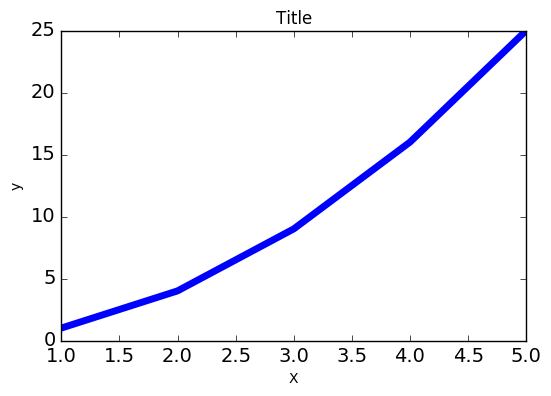

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
input_value  = [1,2,3,4,5]
squares = [1,4,9,16,25]
plt.plot(input_value,squares,linewidth=5)

plt.title('Title')
plt.xlabel('X')
plt.ylabel('y')

plt.tick_params(axis='both',labelsize=14)
plt.show()

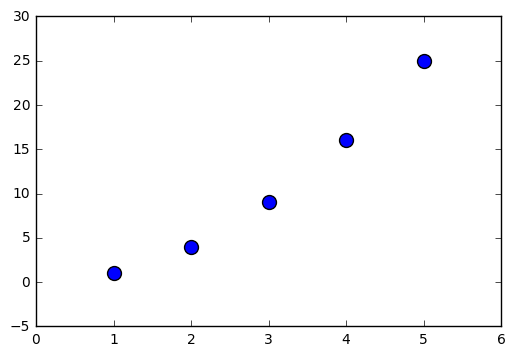

In [6]:
plt.scatter(input_value,squares,s=100)

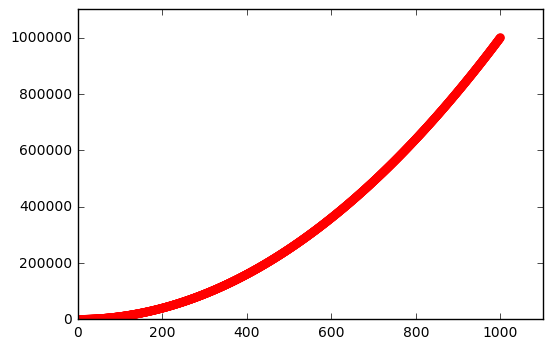

In [10]:
x_value = list(range(1,1001))
y_value = [x**2 for x in x_value]

plt.scatter(x_value,y_value,s=40,
            edgecolors='none',
            c='red')
plt.axis([0,1100,0,1100000])
plt.show()

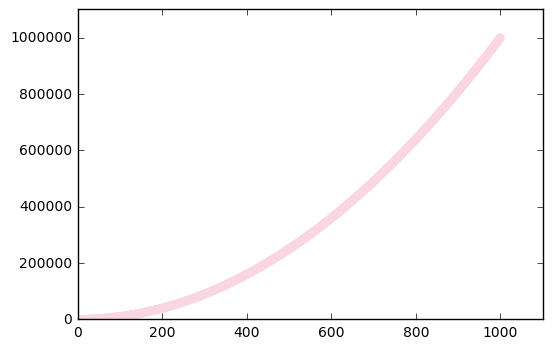

In [12]:
plt.scatter(x_value,y_value,s=40,
            edgecolors='none',
            c=(250/255,214/255,226/255))
plt.axis([0,1100,0,1100000])
plt.show()

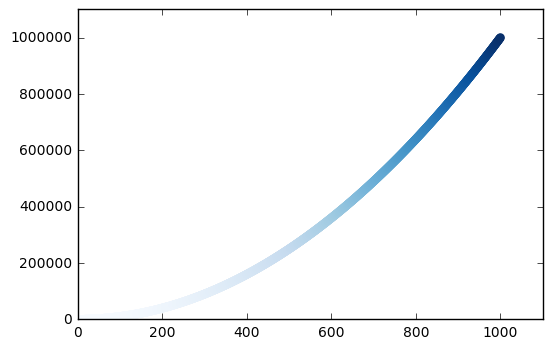

In [16]:
plt.scatter(x_value,y_value,s=40,
            edgecolors='none',c=y_value,
            cmap=plt.cm.Blues)
plt.axis([0,1100,0,1100000])
# plt.show()
plt.savefig('squares_plot.png',bbox_inches='tight')
#bbox_inches='tight' 将图表多余的空白区域裁剪掉。如果要保留图表周围多余的空白区域，可省略这个实参。

# 随机漫步 RandomWalk()

In [21]:
from random import choice

class RandomWalk():
    def __init__(self,num_points=5000):
        self.num_points = num_points
        self.x_values = [0]
        self.y_values = [0]
        
    def fill_walk(self):
        while len(self.x_values) < self.num_points:
            x_direction = choice([1,-1])
            x_distance = choice([0,1,2,3,4])
            x_step = x_direction * x_distance
            
            y_direction = choice([1,-1])
            y_distance = choice([0,1,2,3,4])
            y_step = y_direction * y_distance
            
            if x_step == 0 and y_step == 0:
                continue
                
            next_x = self.x_values[-1] + x_step
            next_y = self.y_values[-1] + y_step
            
            self.x_values.append(next_x)
            self.y_values.append(next_y)

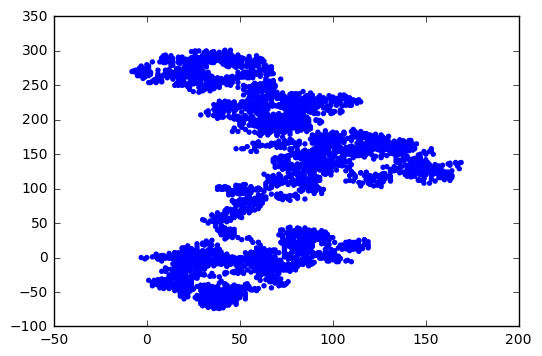

In [29]:
#from random_walk import RandomWalk
rw = RandomWalk()
rw.fill_walk()
plt.scatter(rw.x_values,rw.y_values,s=15,edgecolors='none')
plt.show()

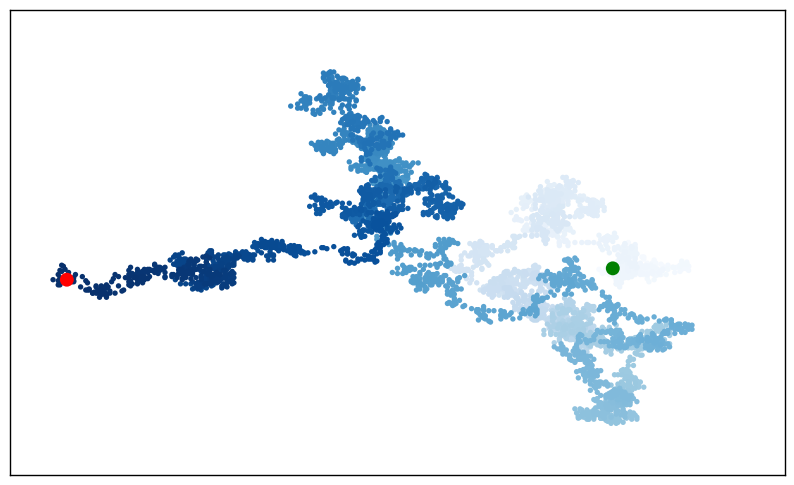

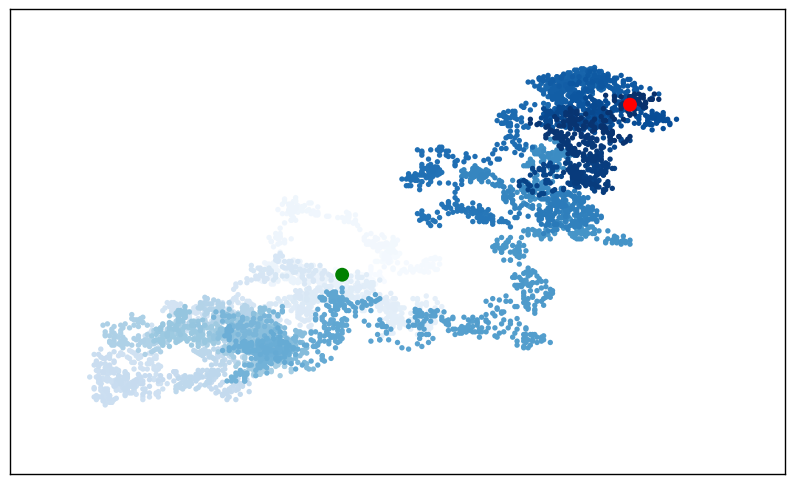

In [42]:
eta = 0
while eta < 2:
    eta += 1
    rw = RandomWalk(num_points=5000)
    rw.fill_walk()
    point_numbers = list(range(rw.num_points))
    
    plt.figure(dpi=1920,figsize=(10,6))
    plt.scatter(rw.x_values,rw.y_values,c=point_numbers,
               cmap=plt.cm.Blues,edgecolor='none',s=15)
    plt.scatter(0,0,c='green',edgecolors='none',s=100)
    plt.scatter(rw.x_values[-1],rw.y_values[-1],c='red',edgecolors='none',s=100)
    #隐藏坐标轴
    plt.axes().get_xaxis().set_visible(False)
    plt.axes().get_yaxis().set_visible(False)
    plt.show()    
    
# keep_running = input('Make another walk? (y/n): ')
# if keep_running == 'n':
#     break

In [1]:
from random import randint

class Die():
    def __init__(self,num_sides=6):
        self.num_sides = num_sides
        
    def roll(self):
        return randint(1,self.num_sides)

In [2]:
die = Die()
results = []
for roll_num in range(100):
    result = die.roll()
    results.append(result)
    
print(results)

[2, 2, 2, 4, 6, 6, 6, 3, 3, 5, 4, 6, 4, 1, 4, 2, 4, 3, 2, 4, 3, 6, 4, 4, 2, 1, 4, 6, 4, 3, 1, 5, 5, 4, 1, 3, 3, 5, 4, 2, 2, 2, 5, 4, 3, 6, 4, 4, 3, 1, 4, 2, 6, 1, 3, 4, 1, 2, 1, 2, 5, 1, 6, 1, 1, 6, 2, 2, 4, 2, 2, 3, 1, 1, 3, 1, 4, 2, 5, 4, 2, 6, 2, 2, 6, 4, 1, 3, 2, 5, 2, 5, 4, 5, 3, 4, 1, 4, 1, 6]


In [5]:
die = Die()
results = []
for roll_num in range(1000):
    result = die.roll()
    results.append(result)
    
frequencies = []
for value in range(1,die.num_sides+1):
    frequency = results.count(value)
    frequencies.append(frequency)
    
print(frequencies)

[180, 155, 150, 168, 164, 183]


In [12]:
import pygal

frequencies = []
for value in range(1,die.num_sides+1):
    frequency = results.count(value)
    frequencies.append(frequency)
    
hist = pygal.Bar()
hist.title = 'Result of rolling one D6 1000 times'
hist.x_labels = ['1','2','3','4','5','6']
hist.x_title = 'Result'
hist.y_title = 'Frequency of Result'

hist.add('D6',frequencies)
hist.render_to_file('die_visual.svg')

In [15]:
die_1 = Die()
die_2 = Die()

results = []
for roll_num in range(1000):
    result = die_1.roll() + die_2.roll()
    results.append(result)

frequencies = []
max_result = die_1.num_sides + die_2.num_sides
for value in range(2,max_result+1):
    frequency = results.count(value)
    frequencies.append(frequency)
    
hist = pygal.Bar()

hist.title = "Results of rolling two D6 dice 1000 times."
hist.x_labels = ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
hist.x_title = "Result"
hist.y_title = "Frequency of Result"

hist.add('D6 + D6',frequencies)
hist.render_to_file('dice_visual.svg')

# Chapter 16

In [1]:
import os
os.chdir(r"D:\迅雷下载\Python编程 源代码文件\chapter_16")

In [2]:
import csv
filename = 'sitka_weather_07-2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    print(header_row)

['AKDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF', 'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity', ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn', ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn', ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles', ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH', 'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees']


In [4]:
import pandas as pd
df = pd.read_csv('sitka_weather_07-2014.csv')
df.head()

,AKDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2014-7-1,64,56,50,53,51,48,96,83,58,...,10,10,10,7,4,NaN,0.00,7,NaN,337
1,2014-7-2,71,62,55,55,52,46,96,80,51,...,10,9,2,13,5,NaN,0.14,7,Rain,327
2,2014-7-3,64,58,53,55,53,51,97,85,72,...,10,10,8,15,4,NaN,0.01,6,NaN,258
3,2014-7-4,59,56,52,52,51,50,96,88,75,...,10,9,2,9,2,NaN,0.07,7,Rain,255
4,2014-7-5,69,59,50,52,50,46,96,72,49,...,10,10,10,13,5,NaN,0.00,6,NaN,110


In [13]:
%time df = pd.read_csv('sitka_weather_07-2014.csv')

Wall time: 0 ns


In [15]:
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    highs = []
    for row in reader:
        highs.append(row[1])
    print(highs)

['64', '71', '64', '59', '69', '62', '61', '55', '57', '61', '57', '59', '57', '61', '64', '61', '59', '63', '60', '57', '69', '63', '62', '59', '57', '57', '61', '59', '61', '61', '66']


AND 感知器的权重和偏差是什么？

In [7]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 1
weight2 = 1
bias = -2


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))


Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                    -2                    0          Yes
       0          1                    -1                    0          Yes
       1          0                    -1                    0          Yes
       1          1                     0                    1          Yes


从 AND 感知器变成 OR 感知器的两种方法是什么？
- 增大权重
- 减少偏差
![](https://s3.cn-north-1.amazonaws.com.cn/u-img/90883050-5cc9-4d3f-9cd3-087edde9eaeb)

用感知器实现逻辑运算 - NOT （"非”）`对第二个输入进行 NOT 运算`


In [24]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 0
weight2 = -0.5
bias = 0.4


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                   0.4                    1          Yes
       0          1                  -0.1                    0          Yes
       1          0                   0.4                    1          Yes
       1          1                  -0.1                    0          Yes


In [228]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    np.random.seed(42)
    x_min, x_max = min(X[0]), max(X[0])
    y_min, y_max = min(X[1]), max(X[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [217]:
import numpy as np
import pandas as pd
# df = pd.read_csv('data.csv')
df = pd.read_csv('data_noheader.csv',header=None)
# df = pd.read_csv('simple_data.csv')
df.head()

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [218]:
df_X = np.array(df.iloc[:,0:2])
df_y = df.iloc[:,2]

In [230]:
boundary_lines = trainPerceptronAlgorithm(df_X,df_y,num_epochs = 25)

In [220]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

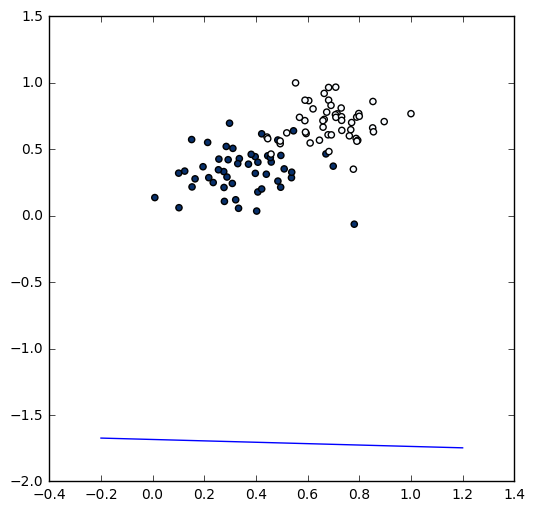

In [251]:
df_plt = pd.read_csv('data.csv')
plt.figure(figsize=(6,6))
X_line = np.linspace(-0.2,1.2,100)
slop,intercept=boundary_lines[0][0],boundary_lines[0][1]
y_line = slop*X_line + intercept
plt.scatter('x1','x2',c='y',data=df_plt,cmap=plt.cm.Blues)
plt.plot(X_line,y_line)

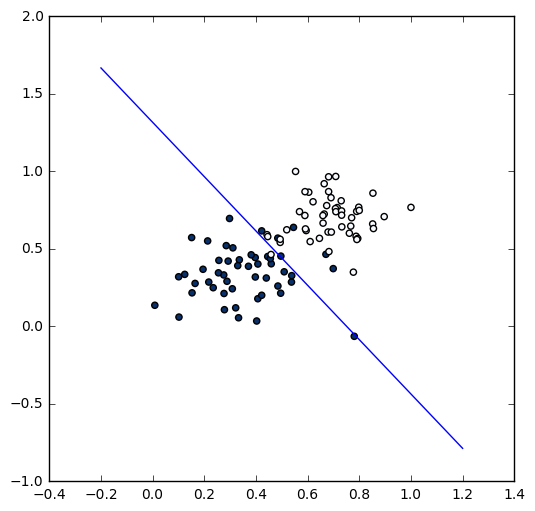

In [250]:
plt.figure(figsize=(6,6))
X_line = np.linspace(-0.2,1.2,100)
slop,intercept=boundary_lines[-1][0],boundary_lines[-1][1]
y_line = slop*X_line + intercept
plt.scatter('x1','x2',c='y',data=df_plt,cmap=plt.cm.Blues)
plt.plot(X_line,y_line)

In [238]:
len(boundary_lines)

25

D:\Anaconda\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


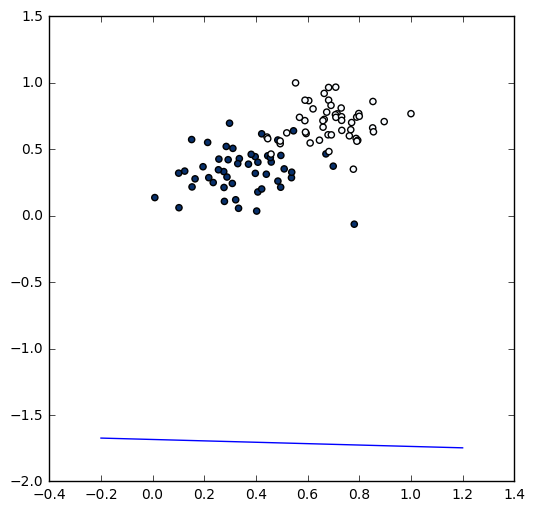

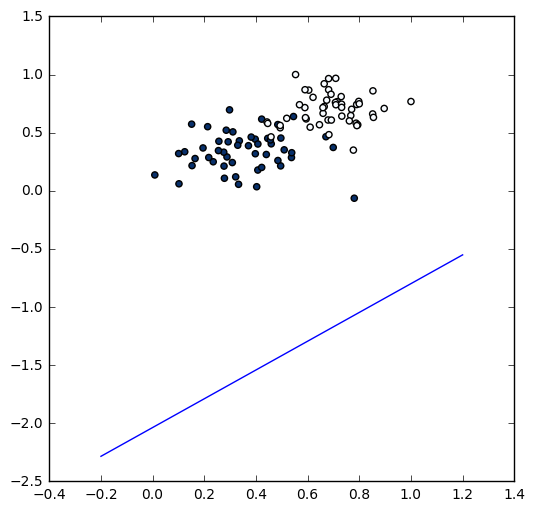

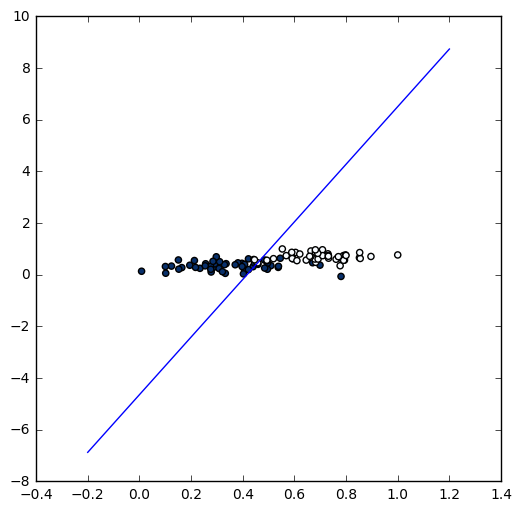

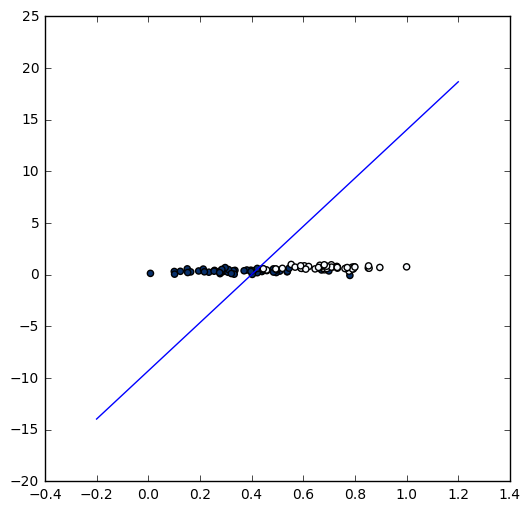

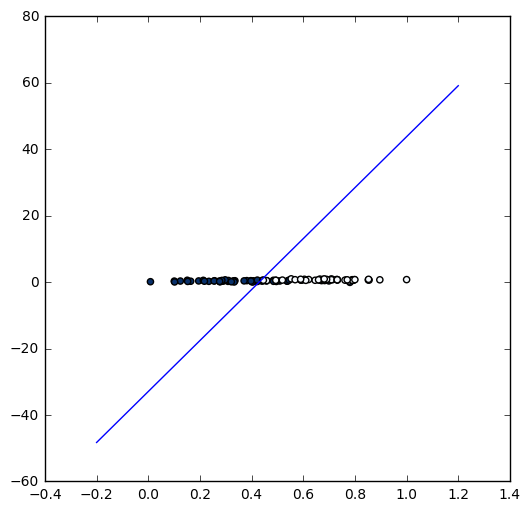

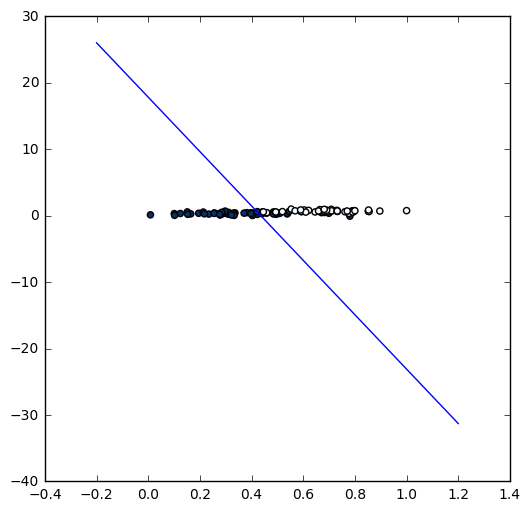

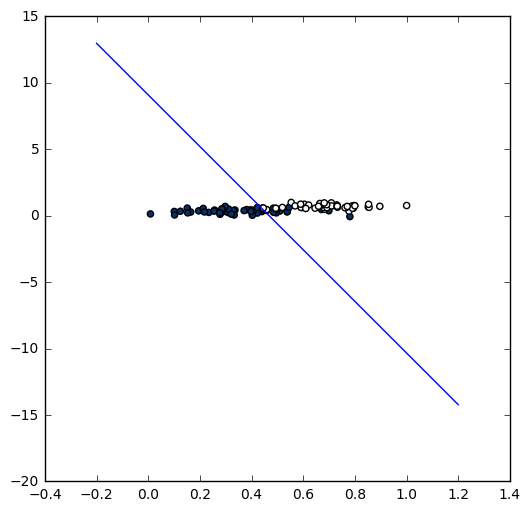

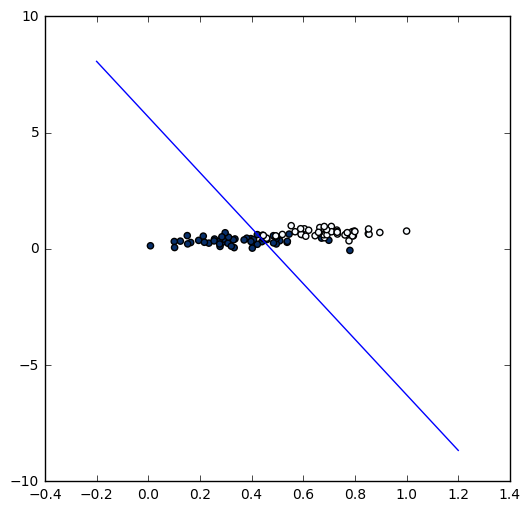

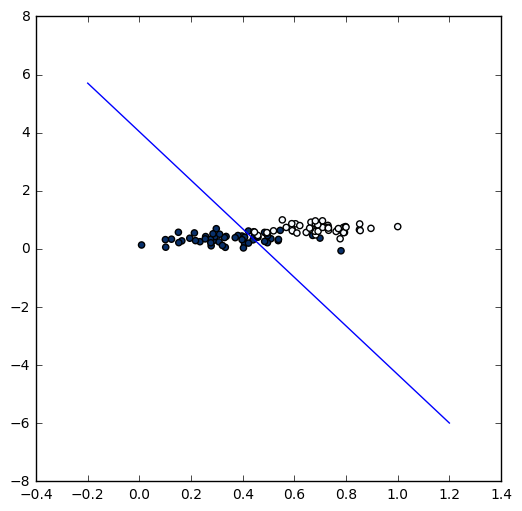

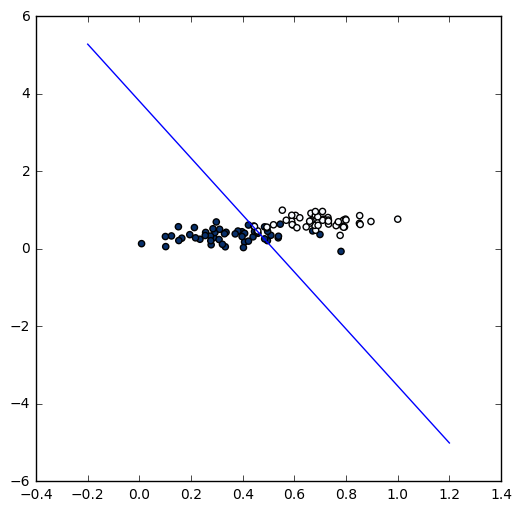

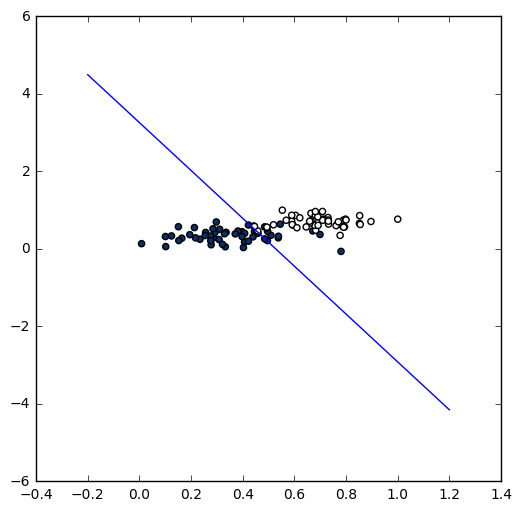

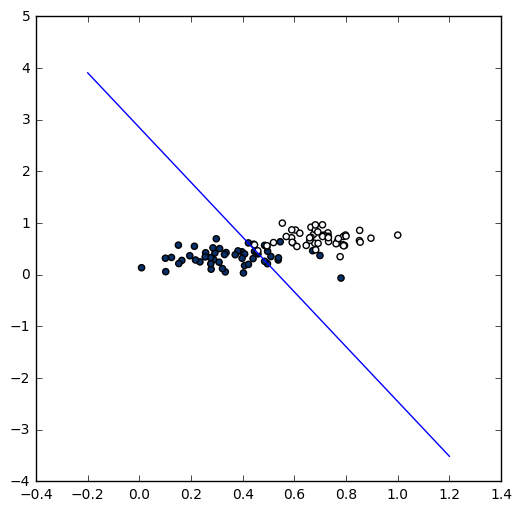

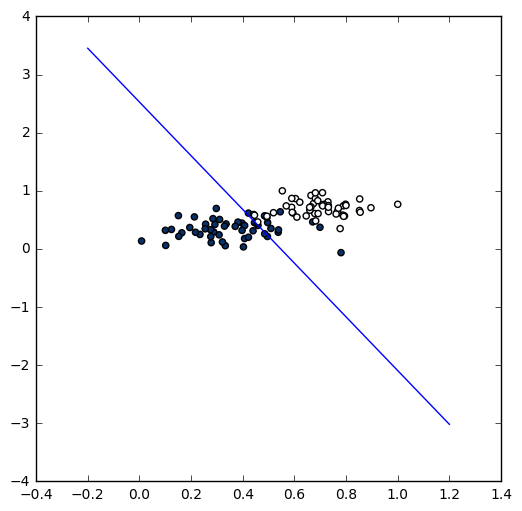

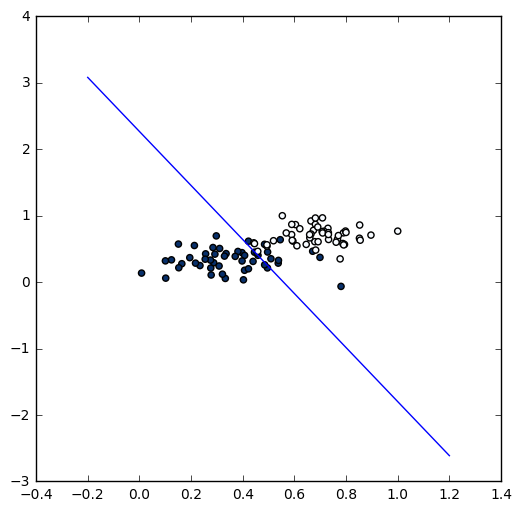

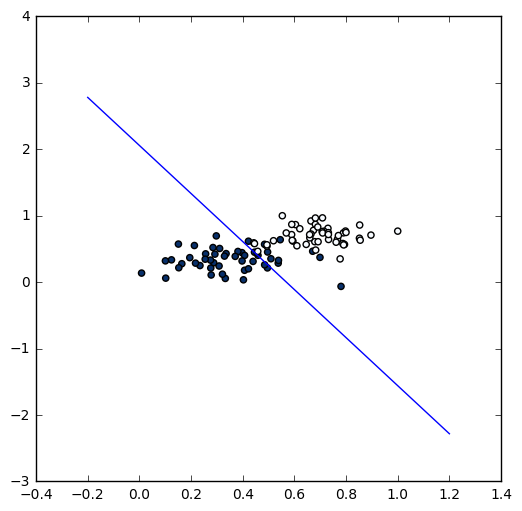

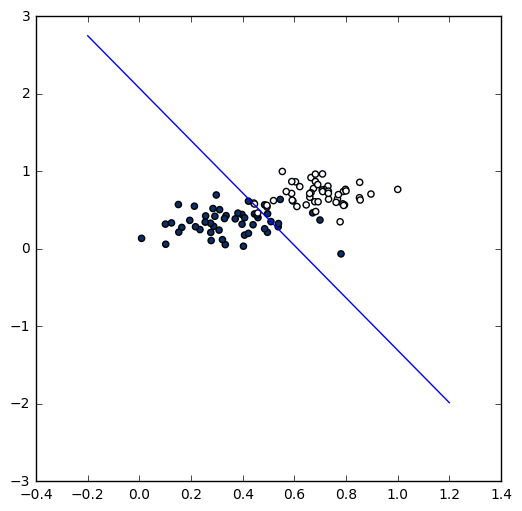

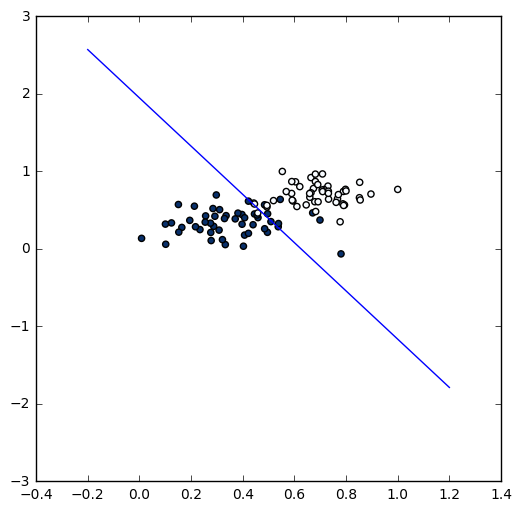

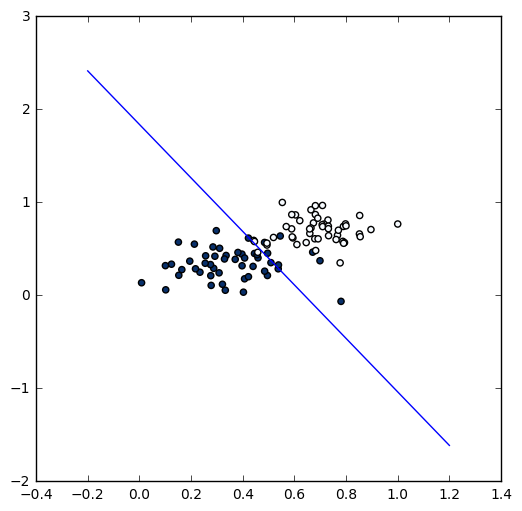

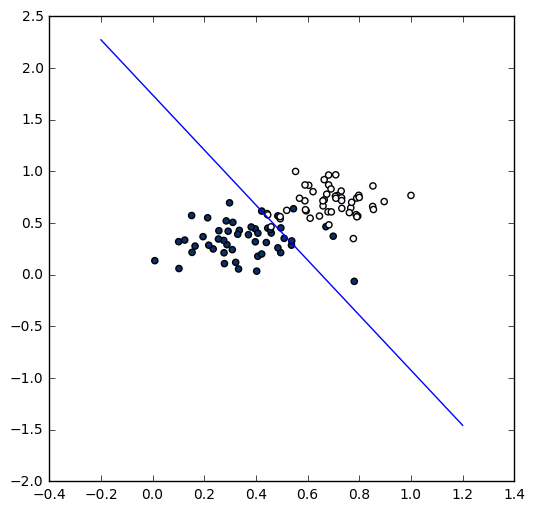

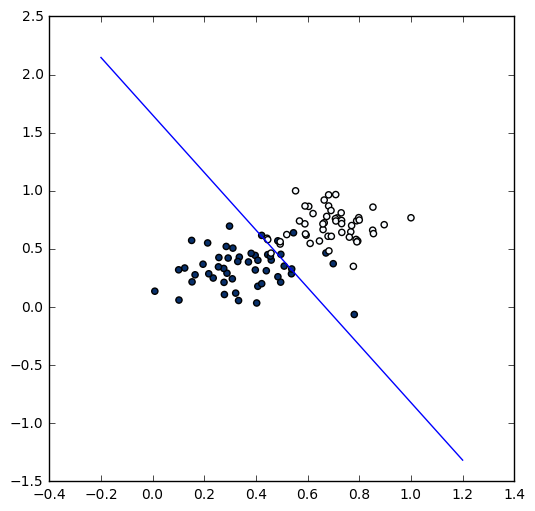

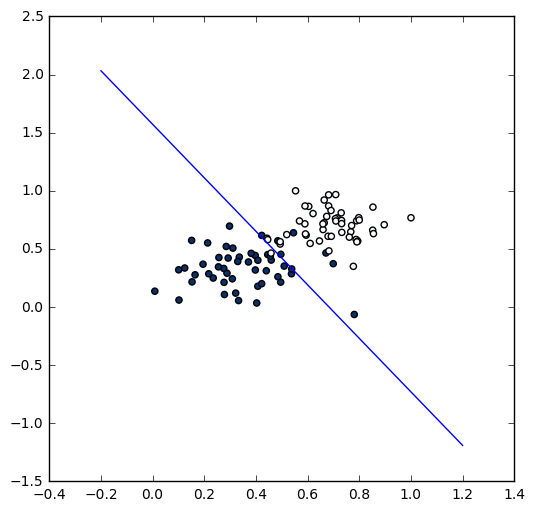

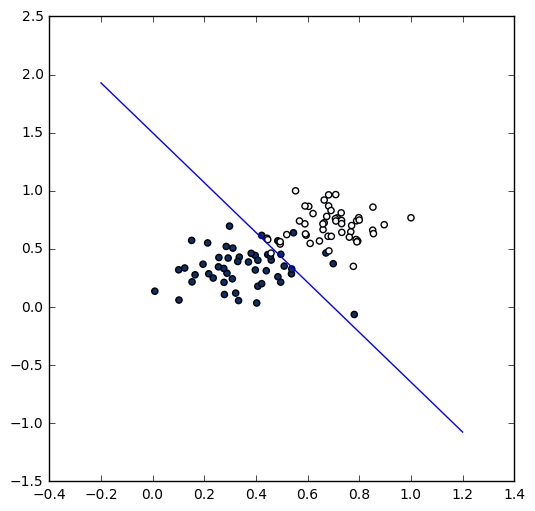

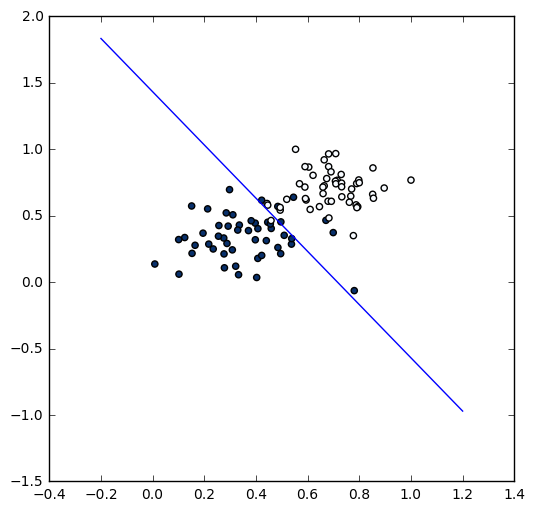

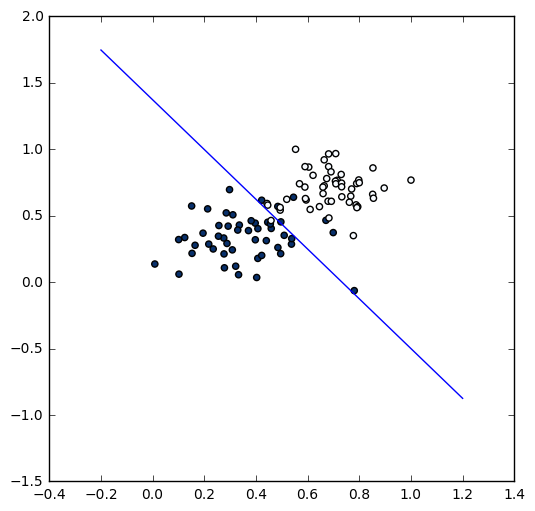

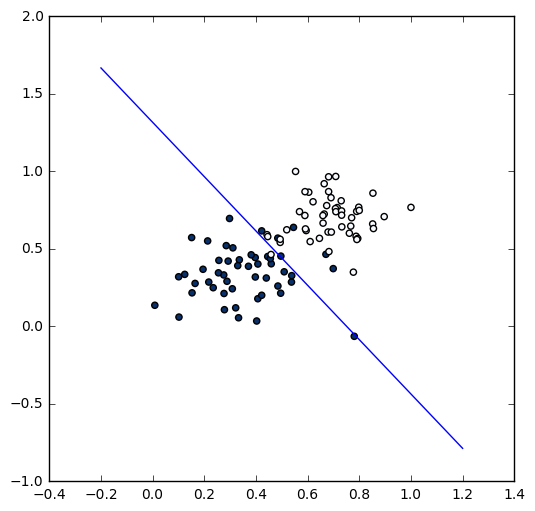

In [243]:
for i in range(25):
    slop,intercept=boundary_lines[i][0],boundary_lines[i][1]
    y_line = slop*X_line + intercept
    plt.figure(figsize=(6,6))
    plt.scatter('x1','x2',c='y',data=df_plt,cmap=plt.cm.Blues)
    plt.plot(X_line,y_line)
    plt.show()

1. https://www.cnblogs.com/liuyang0/p/7927923.html
2. https://github.com/yangliu0/MachineLearning/tree/master/Perceptron
3. https://github.com/LeiG/Applied-Predictive-Modeling-with-Python/blob/master/notebooks/Chapter%202.ipynb